<a href="https://colab.research.google.com/github/1337Rinz/Python/blob/main/lung_cancer_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# source DATA https://www.kaggle.com/datasets/imkrkannan/lung-cancer-dataset-by-staceyinrobert
# Lê Tuấn Kiệt

In [4]:
# import thư viện pandas và numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# đọc data
data = pd.read_csv('/content/survey_lung_cancer.csv')

# print data.shape
print('data shape: ',data.shape)
# show 5 dòng đầu 
data.head(5)


data shape:  (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [6]:
# ktra có dữ liệu khuyết không
data.isnull().values.any()

False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


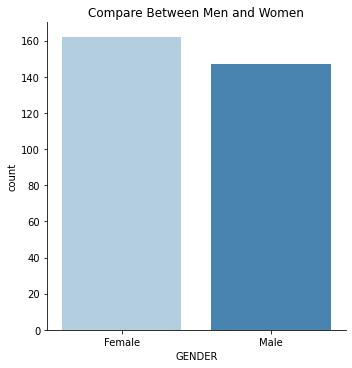

In [21]:
sns.catplot('GENDER',data=data,kind='count',palette='Blues').set(title='Compare Between Men and Women').set_xticklabels(['Female','Male'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


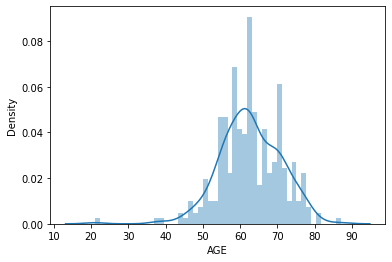

In [22]:
# tỉ trọng 
sns.distplot(data['AGE'],bins=50)

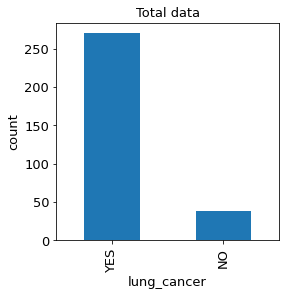

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64


In [28]:
# Trực quan hoá cột (LUNG_CANCER)
import matplotlib.pyplot as plt

plt.figure(figsize = (4,4))
plt.title("Total data",fontsize=13)
plt.xlabel("lung_cancer", fontsize=13)
plt.ylabel("count",fontsize=13)
data["LUNG_CANCER"].value_counts().plot(kind= 'bar',fontsize=13)
plt.show()

# đếm giá trị của cột mục tiêu (LUNG_CANCER)
print(data["LUNG_CANCER"].value_counts())

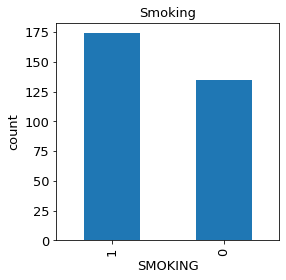

In [27]:

plt.figure(figsize = (4,4))
plt.title("Smoking",fontsize=13)
plt.xlabel("SMOKING", fontsize=13)
plt.ylabel("count",fontsize=13)
data["SMOKING"].value_counts().plot(kind= 'bar',fontsize=13)
plt.show()

In [29]:
# mô tả data
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# kiểm trùng và loại bỏ
data.drop_duplicates(inplace=True)
data.shape

(276, 16)

In [34]:
# xử lý data cột GENDER và cột LUNG_CANCER về kiểu số

data['GENDER'] = data['GENDER'].apply(lambda x: 1 if x=='MALE' else 0)
data['LUNG_CANCER'] = data['LUNG_CANCER'].apply(lambda x: 1 if x=='YES' else 0)
data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


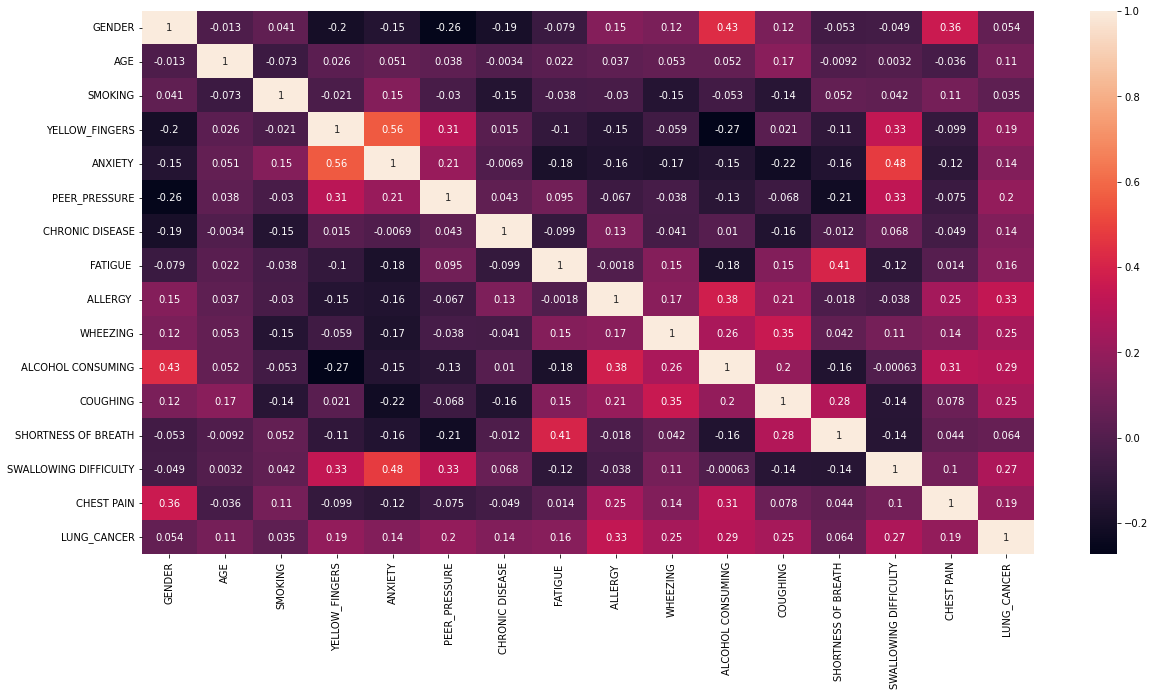

In [35]:
# khởi tạo figure
plt.figure(figsize=(20,10))
# phân tích tương quan bằng heatmap
sns.heatmap(data.corr(),annot=True)

=== Thực nghiệm


In [36]:
# import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [37]:
# select 15 cột đầu for x ; cột LUNG_CANCER for y
# data.iloc[<row selection>,<column selection>]

x = data.iloc[ :,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values
y = data["LUNG_CANCER"].values
x

array([[ 1, 69,  0, ...,  1,  1,  1],
       [ 1, 74,  1, ...,  1,  1,  1],
       [ 0, 59,  0, ...,  1,  0,  1],
       ...,
       [ 1, 55,  1, ...,  1,  0,  1],
       [ 1, 46,  0, ...,  0,  1,  1],
       [ 1, 60,  0, ...,  1,  1,  1]])

In [38]:
# chia tập train:test theo tỉ lệ 65:35 để đánh giá hiệu xuất;
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.35 , random_state=19)
print('x_train: ',x_train.shape)
print('x_test: ', x_test.shape)

x_train:  (179, 15)
x_test:  (97, 15)


In [61]:
# naive bayes trên tập train

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
model.predict(x_train)

print("accuracy = " ,accuracy_score(y_test, model.predict(x_test)))
score_4 = accuracy_score(y_test, model.predict(x_test))

accuracy =  0.9175257731958762


In [40]:
model_predict = model.predict(x_test)

print('accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, model_predict)))
accuracy_score = (metrics.accuracy_score(y_test, model_predict))

# True positive (TP) ; False positive (FP)
# False negative (FN); True negative (TN)
print(metrics.confusion_matrix(y_test, model_predict, labels=[1,0]))

# Báo cáo
print('\nClassification Report:')
print(metrics.classification_report(y_test, model_predict, labels=[1,0]))

accuracy: 0.92
[[82  4]
 [ 4  7]]

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        86
           0       0.64      0.64      0.64        11

    accuracy                           0.92        97
   macro avg       0.79      0.79      0.79        97
weighted avg       0.92      0.92      0.92        97



 Precision = (TP/(TP+FP) 

 Recall    = (TP/(TP+FN) 

 F1 Score  = (2/((Precision^-1)+(Recall^-1))


In [41]:
GENDER=1
AGE=20
SMOKING =0
YELLOW_FINGERS = 0
ANXIETY = 0
PEER_PRESSURE = 1
CHRONIC_DISEASE = 0
FATIGUE =1
ALLERGY= 0
WHEEZING = 1
ALCOHOL_CONSUMING = 0
COUGHING = 1
SHORTNESS_OF_BREATH = 1
SWALLOWING_DIFFICULTY = 0
CHEST_PAIN =1

In [42]:
model_predict = [[GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE ,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN]]
model_pred =model.predict(model_predict)

if model_pred == 1:
    result = "Có dấu hiệu bị ung thư phổi"
elif model_pred == 0 :
    result = "Không có dấu hiệu bị ung thư phổi"
else :
    result = "error "

print("Dựa trên thông tin được đưa vào\n với độ chính xác {:.2f} ta có dự đoán:\n >> {}".format((accuracy_score),result))

Dựa trên thông tin được đưa vào
 với độ chính xác 0.92 ta có dự đoán:
 >> Không có dấu hiệu bị ung thư phổi


# So sánh các thuật toán khác



In [54]:
# logisticregression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
list_scores=[]
list_models=[]
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)
list_models.append('logisticregression')
list_scores.append(score_1)

score_1

0.9381443298969072

In [55]:
# Support vector machine

from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_2=svm.predict(x_test)
score_2=accuracy_score(y_test,pred_2)
list_scores.append(score_2)
list_models.append('svm')

score_2

0.8865979381443299

In [56]:
# randomforest classifier

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_3=rfc.predict(x_test)
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)
list_models.append('randomforest classifier')
score_3

0.9381443298969072

In [62]:
list_scores.append(score_4)
list_models.append('naive bayes')

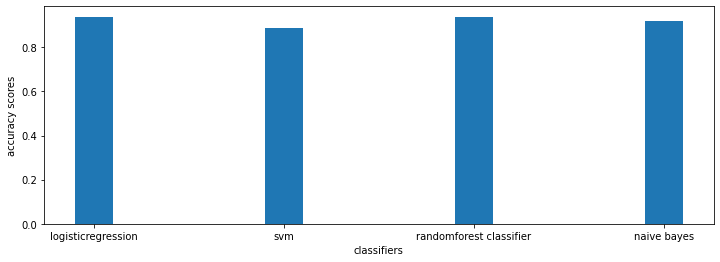

In [63]:
plt.figure(figsize=(12,4))
plt.bar(list_models,list_scores,width=0.2)
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')
plt.show()